# EXTRACT DATA FEATURES FOR CAUSAL INFERENCE

## Load the data

In [2]:
import pandas as pd
import re

In [48]:
data = pd.read_csv('saved_data/lemmatized_reviews_Bacchanal_Buffet.csv', parse_dates=['date'], lineterminator='\n')
data = data.dropna(axis=0)
data.reset_index(inplace=True, drop=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123 entries, 0 to 10122
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          10123 non-null  object        
 1   business_id      10123 non-null  object        
 2   stars            10123 non-null  int64         
 3   useful           10123 non-null  int64         
 4   text             10123 non-null  object        
 5   date             10123 non-null  datetime64[ns]
 6   text_length      10123 non-null  int64         
 7   nbr_words        10123 non-null  int64         
 8   lemmatized_text  10123 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 711.9+ KB


,user_id,business_id,stars,useful,text,date,text_length,nbr_words,lemmatized_text
0,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,937,176,get food poisoning Palms hotel scared eat buff...
1,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,4975,940,feast worthy god Baccarnal Buffet Caesar Palac...
2,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,671,131,crab leg well one Wicked Spoon huge prawn shee...
3,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,92,18,worth salty food expensive furst kast visit bu...
4,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,333,63,infinite star family diamond card Caesars Pala...


### Remove some unnecessary characters

In [49]:
data['processed_text'] = data.text.apply(lambda x: re.sub(r'[\n]', ' ', x))
data.head()

,user_id,business_id,stars,useful,text,date,text_length,nbr_words,lemmatized_text,processed_text
0,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,937,176,get food poisoning Palms hotel scared eat buff...,After getting food poisoning at the Palms hote...
1,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,4975,940,feast worthy god Baccarnal Buffet Caesar Palac...,"""A feast worthy of Gods"" Baccarnal Buffet in ..."
2,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,671,131,crab leg well one Wicked Spoon huge prawn shee...,The crab legs are better than the ones at Wick...
3,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,92,18,worth salty food expensive furst kast visit bu...,Not worth it! Too salty food and expensive! Th...
4,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,333,63,infinite star family diamond card Caesars Pala...,I would give this infinite stars if I could. M...


## Extract features 

In [5]:
from matplotlib import pyplot as plt

**Treatments:**
- Latent treatments inferred by sIBP
- Sentiment of the review

**Confounders:**
- Star rating
- Number of words
- Reviewer's number of fans
- Reviewer's number of written reviews

**Others:**
- Formality of the review
- Reviewer's average star rating

In [6]:
features = pd.DataFrame()

### Treatment: Latent treatments inferred by sIBP

In [50]:
## Read results from the sIBP

treatments = pd.read_csv('saved_data/sibp_treatments.csv')

n_latent_treatments = len(treatments.columns)-1

treatments.info()
treatments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123 entries, 0 to 10122
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_test_data  10123 non-null  int64  
 1   Z1            10123 non-null  float64
 2   Z2            10123 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 237.4 KB


,is_test_data,Z1,Z2
0,1,1.000000e+00,1.000000e+00
1,1,1.000000e+00,1.790524e-180
2,0,2.006906e-27,9.842977e-43
3,1,1.493567e-50,1.381000e-12
4,1,9.996250e-40,2.347771e-26


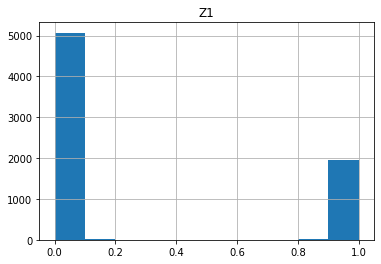

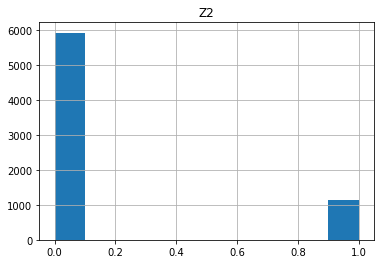

In [8]:
## Have a look at the latent treatments

for i in range(1, n_latent_treatments+1):
    plt.figure();
    plt.title('Z' + str(i))
    treatments['Z' + str(i)].loc[treatments['is_test_data'] == 1].hist();

In [9]:
features['test'] = treatments['is_test_data']

for i in range(1, n_latent_treatments+1):
    col = 'Z' + str(i)
    features[col] = treatments.apply(lambda row: 1 if row[col] > 0.5 else 0, axis=1)

groupby = ['test']
groupby.extend(['Z' + str(i) for i in range(1, n_latent_treatments+1)])
print(features.groupby(by=groupby).size()) 
    
features.head()

test  Z1  Z2
0     0   0      697
      1   0      363
          1     1976
1     0   0     5092
      1   0      835
          1     1160
dtype: int64


,test,Z1,Z2
0,1,1,1
1,1,1,0
2,0,0,0
3,1,0,0
4,1,0,0


### Suspicious
No Z1, Z2 features are equal to \[0, 1\]??

In [10]:
features[(features.Z1==0) & (features.Z2==0).all()]

,test,Z1,Z2


### Also suspicious, the test data is overrepresented for zero sIBP-features.

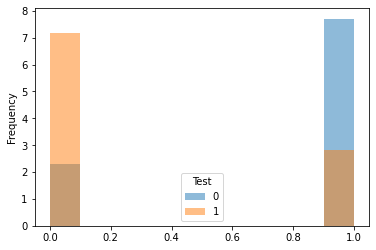

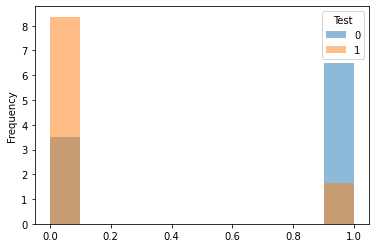

In [11]:
features.groupby('test').Z1.plot(kind='hist', alpha=0.5, density=True)
plt.legend(title='Test')
plt.show()

features.groupby('test').Z2.plot(kind='hist', alpha=0.5, density=True)
plt.legend(title='Test')
plt.show()

### Treatment: Sentiment of the review

In [1]:
from transformers import pipeline
import numpy as np

In [90]:
is_positive_sentiment_list = []
sentiment_certainty_list = []

for index, row in data.iterrows():
    if index%200 == 0:
        print(f"Evaluating index {index}...")

    trimmed_text = " ".join(row.processed_text.split(" ")[0:300])
    try:
        result = nlp_sentiment(trimmed_text)
        is_positive_sentiment_list.append(1 if result[0]["label"] == "POSITIVE" else 0)
        sentiment_certainty_list.append(result[0]["score"])
    except Exception as e:
        print(e)
        print(f"PROBLEM TEXT INDEX: {index}")
        is_positive_sentiment_list.append(None)
        sentiment_certainty_list.append(None)

Evaluating index 0...
Evaluating index 200...
Evaluating index 400...
Evaluating index 600...
Evaluating index 800...
index out of range in self
PROBLEM TEXT INDEX: 864
Evaluating index 1000...
Evaluating index 1200...
Evaluating index 1400...
Evaluating index 1600...
Evaluating index 1800...
Evaluating index 2000...
Evaluating index 2200...
Evaluating index 2400...
index out of range in self
PROBLEM TEXT INDEX: 2557
Evaluating index 2600...
index out of range in self
PROBLEM TEXT INDEX: 2690
Evaluating index 2800...
Evaluating index 3000...
Evaluating index 3200...
Evaluating index 3400...
index out of range in self
PROBLEM TEXT INDEX: 3535
Evaluating index 3600...
Evaluating index 3800...
Evaluating index 4000...
index out of range in self
PROBLEM TEXT INDEX: 4153
Evaluating index 4200...
Evaluating index 4400...
Evaluating index 4600...
index out of range in self
PROBLEM TEXT INDEX: 4617
Evaluating index 4800...
index out of range in self
PROBLEM TEXT INDEX: 4930
Evaluating index 50

In [99]:
sentiment_data = pd.DataFrame({"is_positive_sentiment": is_positive_sentiment_list, "sentiment_certainty": sentiment_certainty_list})
sentiment_data.to_csv("saved_data/sentiment_data.csv", index=False)

In [51]:
sentiment_data = pd.read_csv("saved_data/sentiment_data.csv")
sentiment_data.head()

,is_positive_sentiment,sentiment_certainty
0,1.0,0.999428
1,0.0,0.990075
2,1.0,0.935575
3,0.0,0.999454
4,1.0,0.999430


In [52]:
features['is_positive_sentiment'] = sentiment_data.is_positive_sentiment.copy()
features['sentiment_certainty'] = sentiment_data.sentiment_certainty.copy()
features.head()

,test,Z1,Z2,is_positive_sentiment,sentiment_certainty,stars,n_words,useful,useful_discrete
0,1,1,1,1.0,0.999428,5,176,0,0
1,1,1,0,0.0,0.990075,4,940,39,3
2,0,0,0,1.0,0.935575,4,131,1,1
3,1,0,0,0.0,0.999454,1,18,0,0
4,1,0,0,1.0,0.999430,5,63,0,0


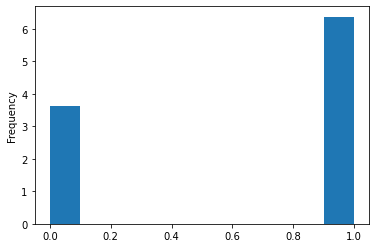

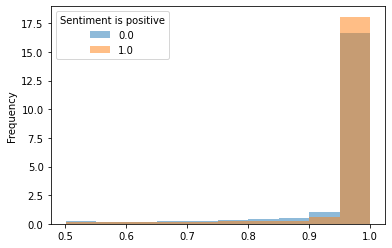

In [53]:
features.is_positive_sentiment.plot(kind='hist', density=True)
plt.show()

features.groupby('is_positive_sentiment').sentiment_certainty.plot(kind='hist', alpha=0.5, density=True)
plt.legend(title='Sentiment is positive')
plt.show()

### Confounders: Star rating & Number of words

In [54]:
features[['stars', 'n_words']] = data[['stars', 'nbr_words']]

features.head()

,test,Z1,Z2,is_positive_sentiment,sentiment_certainty,stars,n_words,useful,useful_discrete
0,1,1,1,1.0,0.999428,5,176,0,0
1,1,1,0,0.0,0.990075,4,940,39,3
2,0,0,0,1.0,0.935575,4,131,1,1
3,1,0,0,0.0,0.999454,1,18,0,0
4,1,0,0,1.0,0.999430,5,63,0,0


### Confounder: Reviewer's number of fans & Reviewer's number of written reviews

In [55]:
# Read user data (takes a minute or two but works fine)

#df_users = pd.read_json('../yelp_data/user.json', lines=True)
df_users = pd.read_json('data/yelp_academic_dataset_user.json', lines=True)

df_users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31


In [64]:
df_users = df_users[df_users.user_id.isin(data.user_id)]
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9854 entries, 49 to 1181167
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             9854 non-null   object 
 1   name                9854 non-null   object 
 2   review_count        9854 non-null   int64  
 3   yelping_since       9854 non-null   object 
 4   useful              9854 non-null   int64  
 5   funny               9854 non-null   int64  
 6   cool                9854 non-null   int64  
 7   elite               9854 non-null   object 
 8   friends             9854 non-null   object 
 9   fans                9854 non-null   int64  
 10  average_stars       9854 non-null   float64
 11  compliment_hot      9854 non-null   int64  
 12  compliment_more     9854 non-null   int64  
 13  compliment_profile  9854 non-null   int64  
 14  compliment_cute     9854 non-null   int64  
 15  compliment_list     9854 non-null   int64  
 16  co

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
49,mAhty2OHDTtLm00quB5Xjw,Jon,883,2008-10-04 15:03:28,953,465,298,"2009,2010,2011","f4TsuWqlriThpv_6IqRoxg, eXPEipIFZ0t16u8GJigb9g...",21,...,2,1,1,1,15,23,6,6,5,0
53,kxj7TPtJY2zbEjGV0PYfAA,Jenna,1399,2008-08-04 03:29:54,7341,4510,4912,"2008,2009,2010,2011,2013,2014,2015,2016,2017,2018","DecNq9BYtMwHhgdnPNGbVQ, rN36leHXl7n4LOJ_6Dh0zA...",89,...,35,28,34,22,162,313,390,390,136,16
58,13m1o7XsVfSDESEPmkfXng,Alexander,349,2008-01-28 06:42:53,280,141,137,"2009,2010","8TTI9j9QFmvyCLe4AwLMBQ, IlO_qIXrsn7LuWj0whIzBg...",14,...,4,0,2,0,7,10,15,15,9,2
114,13f_vtUZEmlzweL91bmVng,Michelle,1002,2009-08-13 02:18:10,29505,26276,28796,"2010,2011,2012,2013,2014","ju7843SNtWBC5FdV-GO8Kw, xExFffLMwG2V6-709f3oFg...",306,...,761,1183,1101,411,2339,6790,10235,10235,2555,11987
127,FOqxbPyEEP5Yfu5Qiy_XUA,Sarah,412,2008-11-10 03:33:15,1177,961,1211,"2009,2011,2012,2013,2014,2015,2016,2017,2018","7BrFcRWNlWpJrYwrx3eQOA, NT4lhI_REaEi-NWLPpDogQ...",68,...,40,11,19,19,68,153,360,360,79,65


In [65]:
n_fans = []
n_reviews = []

for _, row in data.iterrows():
    temp = df_users.loc[df_users['user_id'] == row.user_id]
    n_fans.append(temp.iloc[0].fans)
    n_reviews.append(temp.iloc[0].review_count)

features['n_fans'] = n_fans
features['n_reviews'] = n_reviews

features.head()

,test,Z1,Z2,is_positive_sentiment,sentiment_certainty,stars,n_words,useful,useful_discrete,n_fans,n_reviews
0,1,1,1,1.0,0.999428,5,176,0,0,0,3
1,1,1,0,0.0,0.990075,4,940,39,3,330,1224
2,0,0,0,1.0,0.935575,4,131,1,1,113,1864
3,1,0,0,0.0,0.999454,1,18,0,0,0,6
4,1,0,0,1.0,0.999430,5,63,0,0,0,15


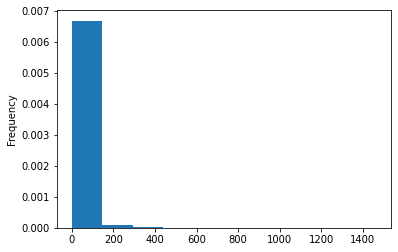

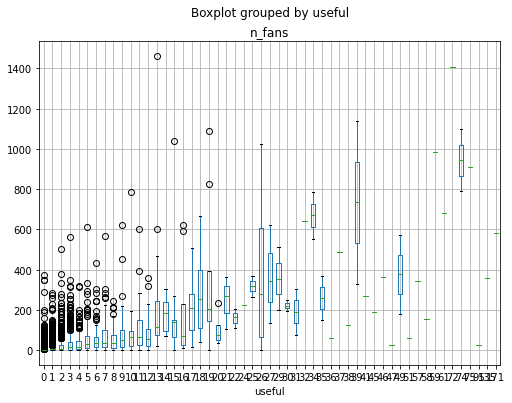

In [66]:
features.n_fans.plot(kind='hist', density=True)
plt.show()
features.boxplot(by='useful', column='n_fans', figsize=(8,6))
plt.show()

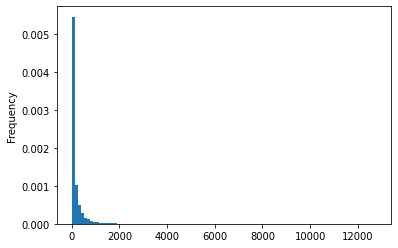

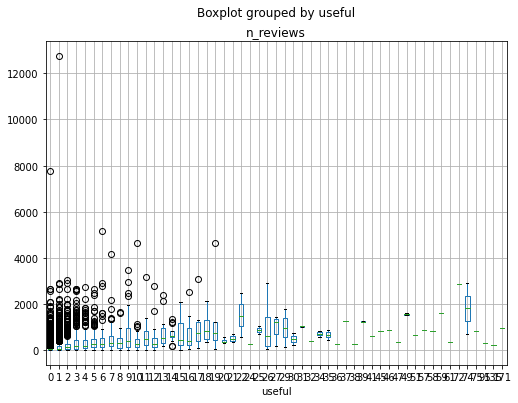

In [69]:
features.n_reviews.plot(kind='hist', bins=100, density=True)
plt.show()
features.boxplot(by='useful', column='n_reviews', figsize=(8,6))
plt.show()

## Group label 'useful'

In [76]:
features['useful'] = data['useful']

def group_useful(useful):
    if useful == 0:
        return 0
    elif useful <= 5:
        return 1
    elif useful <= 10:
        return 2
    else:
        return 3

def group_useful_3(useful):
    if useful == 0:
        return 0
    elif useful <= 10:
        return 1
    else:
        return 2

def group_useful_2(useful):
    if useful == 0:
        return 0
    else:
        return 1

features['useful_discrete'] = features.apply(lambda row: group_useful_2(row['useful']), axis=1)

features.head()

,test,Z1,Z2,is_positive_sentiment,sentiment_certainty,stars,n_words,useful,useful_discrete,n_fans,n_reviews
0,1,1,1,1.0,0.999428,5,176,0,0,0,3
1,1,1,0,0.0,0.990075,4,940,39,1,330,1224
2,0,0,0,1.0,0.935575,4,131,1,1,113,1864
3,1,0,0,0.0,0.999454,1,18,0,0,0,6
4,1,0,0,1.0,0.999430,5,63,0,0,0,15


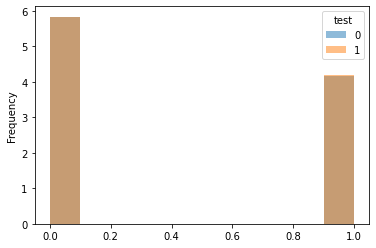

In [77]:
features.groupby('test').useful_discrete.plot(kind='hist', alpha=0.5, density=True)
plt.legend(title='test')
plt.show()

## Save features to file

In [89]:
filename = 'saved_data/features_lovisa.csv'

features.to_csv(filename, index=False)

## Merge features with data and save

In [78]:
data.info()
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123 entries, 0 to 10122
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          10123 non-null  object        
 1   business_id      10123 non-null  object        
 2   stars            10123 non-null  int64         
 3   useful           10123 non-null  int64         
 4   text             10123 non-null  object        
 5   date             10123 non-null  datetime64[ns]
 6   text_length      10123 non-null  int64         
 7   nbr_words        10123 non-null  int64         
 8   lemmatized_text  10123 non-null  object        
 9   processed_text   10123 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 791.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123 entries, 0 to 10122
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------            

In [79]:
data_features = pd.concat([data, features], join='inner', axis=1)

data_features.info()
data_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123 entries, 0 to 10122
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                10123 non-null  object        
 1   business_id            10123 non-null  object        
 2   stars                  10123 non-null  int64         
 3   useful                 10123 non-null  int64         
 4   text                   10123 non-null  object        
 5   date                   10123 non-null  datetime64[ns]
 6   text_length            10123 non-null  int64         
 7   nbr_words              10123 non-null  int64         
 8   lemmatized_text        10123 non-null  object        
 9   processed_text         10123 non-null  object        
 10  test                   10123 non-null  int64         
 11  Z1                     10123 non-null  int64         
 12  Z2                     10123 non-null  int64         
 13  i

,user_id,business_id,stars,useful,text,date,text_length,nbr_words,lemmatized_text,processed_text,...,Z1,Z2,is_positive_sentiment,sentiment_certainty,stars,n_words,useful,useful_discrete,n_fans,n_reviews
0,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,937,176,get food poisoning Palms hotel scared eat buff...,After getting food poisoning at the Palms hote...,...,1,1,1.0,0.999428,5,176,0,0,0,3
1,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,4975,940,feast worthy god Baccarnal Buffet Caesar Palac...,"""A feast worthy of Gods"" Baccarnal Buffet in ...",...,1,0,0.0,0.990075,4,940,39,1,330,1224
2,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,671,131,crab leg well one Wicked Spoon huge prawn shee...,The crab legs are better than the ones at Wick...,...,0,0,1.0,0.935575,4,131,1,1,113,1864
3,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,92,18,worth salty food expensive furst kast visit bu...,Not worth it! Too salty food and expensive! Th...,...,0,0,0.0,0.999454,1,18,0,0,0,6
4,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,333,63,infinite star family diamond card Caesars Pala...,I would give this infinite stars if I could. M...,...,0,0,1.0,0.999430,5,63,0,0,0,15


### Sentiment nan values seem to appear when:
* Links are included.
* Special signs are used.
* Other languages than english are used.

In [80]:
data_features[data_features.isnull().any(axis=1)]

,user_id,business_id,stars,useful,text,date,text_length,nbr_words,lemmatized_text,processed_text,...,Z1,Z2,is_positive_sentiment,sentiment_certainty,stars,n_words,useful,useful_discrete,n_fans,n_reviews
864,yHbrIShhhHkkl20_KGP4OA,RESDUcs7fIiihp38-d6_6g,3,5,談到位於賭城的自助餐，十個朋友內大概會有七個或更多的朋友推薦這間位於 凱薩宮賭場 Caesa...,2016-11-10 07:50:53,3193,15,凱薩宮賭場 Caesars Palace 年以一億美金的預算來重新翻修打造的bacchana...,談到位於賭城的自助餐，十個朋友內大概會有七個或更多的朋友推薦這間位於 凱薩宮賭場 Caesa...,...,0,0,NaN,NaN,3,15,5,1,154,545
2557,QTt8cR4YSYOF67J8YcpdOA,RESDUcs7fIiihp38-d6_6g,5,3,Den mest SINDSSYGE buffet jeg nogensinde har s...,2016-07-19 02:56:56,1388,244,Den mest SINDSSYGE buffet jeg nogensinde har s...,Den mest SINDSSYGE buffet jeg nogensinde har s...,...,0,0,NaN,NaN,5,244,3,1,13,65
2690,O6EBodP3Fgu_n67efSKnBQ,RESDUcs7fIiihp38-d6_6g,4,6,bacchanal - An occasion of wild and drunken re...,2013-01-05 19:48:02,4266,582,bacchanal occasion wild drunken revelry drunke...,bacchanal - An occasion of wild and drunken re...,...,1,0,NaN,NaN,4,582,6,1,246,876
3535,le3Xn9Mheb1hNxWurF7RSw,RESDUcs7fIiihp38-d6_6g,5,7,"Really, I'm not one for hyperbole, but believe...",2012-12-12 17:19:14,2923,430,hyperbole believe hype Caesars Bacchanal Buffe...,"Really, I'm not one for hyperbole, but believe...",...,1,0,NaN,NaN,5,430,7,1,90,1060
4153,VzBoi7n5pee-iLx5dc5BHA,RESDUcs7fIiihp38-d6_6g,5,3,I am not a buffet type of person. Because I do...,2012-09-23 22:32:03,3407,491,buffet type person big appetite prefer good qu...,I am not a buffet type of person. Because I do...,...,1,0,NaN,NaN,5,491,3,1,39,108
4617,RepuhCglksbbZp4SY8VzFA,RESDUcs7fIiihp38-d6_6g,5,9,"Everyone said it, and I'll repeat it: This is ...",2013-11-05 16:13:51,2879,476,say repeat BEST buffet Vegas eat like seriousl...,"Everyone said it, and I'll repeat it: This is ...",...,1,0,NaN,NaN,5,476,9,1,4,81
4930,X_wC1rgLot5xYG1-fzEpaQ,RESDUcs7fIiihp38-d6_6g,5,2,Buffet-Restaurants haben fast alle Hotels in L...,2012-12-13 17:56:38,2434,361,Buffet Restaurants haben fast alle Hotels Las ...,Buffet-Restaurants haben fast alle Hotels in L...,...,0,0,NaN,NaN,5,361,2,1,89,1625
6969,NNF53TdDIJgeVwYxczklgA,RESDUcs7fIiihp38-d6_6g,5,3,Ayant déjà fait l'expérience de plusieurs buff...,2012-11-30 22:21:26,2161,374,ayant déjà fait de plusieurs buffets lor de mo...,Ayant déjà fait l'expérience de plusieurs buff...,...,0,0,NaN,NaN,5,374,3,1,36,591
9398,JKIkdVqAJLEXTq92gF98bA,RESDUcs7fIiihp38-d6_6g,4,18,"I don't normally pay $60 to eat at a buffet, b...",2014-04-23 05:30:07,3623,579,normally pay $ eat buffet Vegas spend buffet t...,"I don't normally pay $60 to eat at a buffet, b...",...,1,0,NaN,NaN,4,579,18,1,254,1319


In [85]:
data_features.iloc[9398].processed_text

'I don\'t normally pay $60 to eat at a buffet, but when I do, it\'s because I\'m in Vegas.    After all, where else would you have to spend that that much on a buffet?  And while I\'d typically prefer to spend that kind of money on a more "traditional" meal, things are a little different when you\'re in the City of Sin/Gluttony.  So, if I\'m going to do some damage at a buffet, I might as well do it right!  Like so many of the better (and pricier) buffets in Vegas, Bacchanal does a great job of combining both quality (for a buffet) and variety in their offerings.  Seriously, there\'s PLENTY to choose from - seafood (crab legs, raw oysters, mussels, shrimp, etc.), sushi, salad, pizza, pastas, made-to-order tacos, carvery station (lamb, prime rib, sausages, pork loin, etc.), Asian dishes, fruits, desserts (chocolate covered strawberries!), and more.    -- PLATE #1 - Prime Rib, Sausage, lamb, Onion Rings (http://www.yelp.com/biz_photos/bacchanal-buffet-las-vegas-7?select=p2b3VrXJwMZiRd0Jw

### Drop rows with NAN sentiment. 
Not best option, but quickest.

In [86]:
data_features = data_features.dropna(axis=0)
data_features.reset_index(inplace=True, drop=True)
data_features.info()
data_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10114 entries, 0 to 10113
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                10114 non-null  object        
 1   business_id            10114 non-null  object        
 2   stars                  10114 non-null  int64         
 3   useful                 10114 non-null  int64         
 4   text                   10114 non-null  object        
 5   date                   10114 non-null  datetime64[ns]
 6   text_length            10114 non-null  int64         
 7   nbr_words              10114 non-null  int64         
 8   lemmatized_text        10114 non-null  object        
 9   processed_text         10114 non-null  object        
 10  test                   10114 non-null  int64         
 11  Z1                     10114 non-null  int64         
 12  Z2                     10114 non-null  int64         
 13  i

,user_id,business_id,stars,useful,text,date,text_length,nbr_words,lemmatized_text,processed_text,...,Z1,Z2,is_positive_sentiment,sentiment_certainty,stars,n_words,useful,useful_discrete,n_fans,n_reviews
0,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,937,176,get food poisoning Palms hotel scared eat buff...,After getting food poisoning at the Palms hote...,...,1,1,1.0,0.999428,5,176,0,0,0,3
1,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,4975,940,feast worthy god Baccarnal Buffet Caesar Palac...,"""A feast worthy of Gods"" Baccarnal Buffet in ...",...,1,0,0.0,0.990075,4,940,39,1,330,1224
2,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,671,131,crab leg well one Wicked Spoon huge prawn shee...,The crab legs are better than the ones at Wick...,...,0,0,1.0,0.935575,4,131,1,1,113,1864
3,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,92,18,worth salty food expensive furst kast visit bu...,Not worth it! Too salty food and expensive! Th...,...,0,0,0.0,0.999454,1,18,0,0,0,6
4,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,333,63,infinite star family diamond card Caesars Pala...,I would give this infinite stars if I could. M...,...,0,0,1.0,0.999430,5,63,0,0,0,15


## Save data features to file

In [87]:
filename = 'saved_data/data_features_lovisa.csv'

data_features.to_csv(filename, index=False)